# CMM262: Statistics, Day 2 (Choosing the Right Statistical Test)

**Authors**: Michelle Franc Ragsac (mragsac@eng.ucsd.edu) and Clarence Mah (ckmah@ucsd.edu) 

Today, we'll be going over statistical testing in the context of. scientific and biological data analysis. We'll also continue to explore the Palmer Penguins dataset in Python! 

---

## `Review`: Loading in the Palmer Penguins Dataset

Since we'll be using the Palmer Penguins dataset, let's first reload it into this notebook and perform some of the data cleaning in Day 1! 

In [1]:
# Import the packages we need for this section of the notebook
import pandas as pd 
import seaborn as sns

In [2]:
# Load in the Palmer Penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

In [3]:
# Remove rows with missing data and save the filtered data to the same variable 
penguins = penguins.dropna()

Now that we've done some of the easier stuff for you, let's see if you remember the commands to preview our dataset from the Day 1 notebook!

<div class="alert alert-block alert-success">
    <p><b>Practice Exercise:</b> Use the <code>info()</code>, <code>describe()</code>, <code>shape</code>, <code>head()</code> and <code>tail()</code> commands to get summary information about the <code>penguins</code> data.</p>
</div>

In [ ]:
# !TODO

In [ ]:
# ANSWER
penguins.info()

In [ ]:
# ANSWER
penguins.describe()

In [ ]:
# ANSWER
penguins.shape

In [ ]:
# ANSWER
penguins.head()

In [ ]:
# ANSWER
penguins.tail()

---

## Exploring Variable Types in the Palmer Penguins Dataset
In the lecture, we covered that there are two main variable types that you can have: **quantitative** or **categorical** variables. Let's figure out what types of variables we have in our Palmer Penguins dataset!

<div class="alert alert-block alert-info">
    <h4>Reminder: What are quantitative versus categorical variables?</h4>
    <ul>
        <li><b>Quantitative variables</b>: numerical values that represent a measurement</li>
        <li><b>Categorical variables</b>: Label values that places samples into groups</li>
    </ul>
</div>

In [4]:
# Let's preview the dataframe so we can figure out what variable types we have...
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Determining the Unique Categories within a Categorical Variable with the `unique()` and `value_counts()` Methods

`Series.unique()` processes a column within a `DataFrame` to figure out the set of possible categories that the column variable can take.

In [5]:
# For example, let's determine what unique species we have in our dataset
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

As expected, we have the `Adelie`, `Chinstrap`, and `Gentoo` penguins represented in our dataset! But what if we want to see how many penguins we have in each category? We can use the `Series.value_counts()` method to do that!

<div class="alert alert-block alert-info">
    <p>While <code>Series.unique()</code> returns an <code>array</code> (basically a list!) of all of the possible categories you may find within a categorical variable,  the <code>Series.value_counts()</code> method returns another <code>Series</code> object where the rows are labeled with the different categories present, and an unlabeled column contains the number of items present in each category. </p>
</div>

### Using `seaborn` to Visualize All Quantitative Variables Simultaneously with the `sns.pairplot()` Method 
Let's see an overview of all pairwise relationships between our **quantitiative** variables with the `sns.pairplot()` method we learned about in Day 1. This time, we can specify the `hue` parameter to color each sample by our `species` categorical variable.

<div class="alert alert-block alert-info">
    <p>The <code>sns.pairplot()</code> function makes scatterplots by default between two different variables and density plots on the diagonal. (The plots on the diagonal are density plots because it wouldn't be so informative to plot a variable against itself as a scatterplot...)</p>
</div>

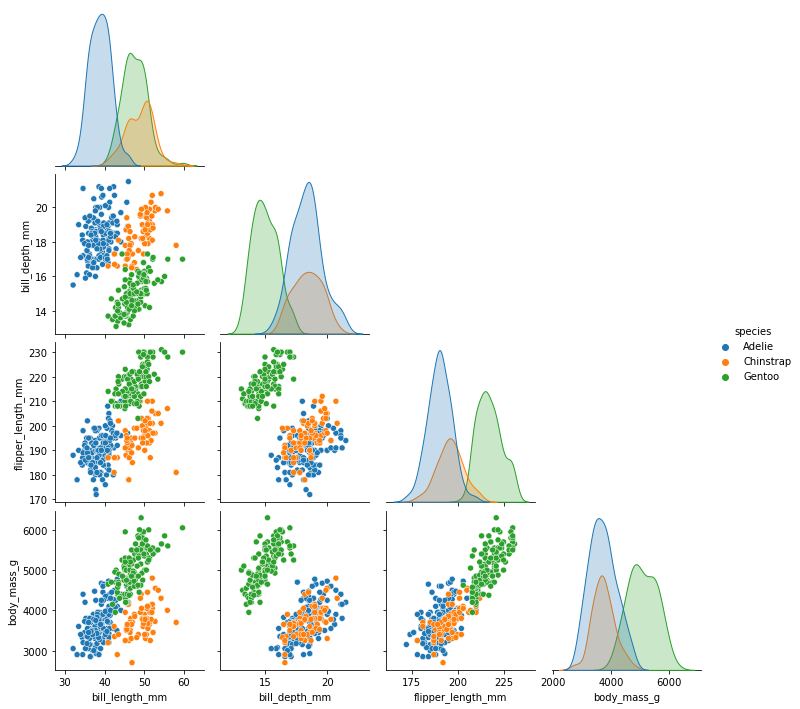

In [6]:
# Use the pairplot() method to view relationships between quantitative variables
sns.pairplot(penguins, 
             hue='species', # color each parameter by species and include a legend
             corner=True)   # turn off the redundant plots in the upper-right 

### Visualizing the Distribution for a Single Variable with the `sns.displot()` Method
We can plot the distribution for a single variable grouped by species with the `sns.displot()` method, but to do so, we need to set a few command parameters. We've included what they all mean below:  

> **Parameters used in the `sns.displot()` command**:
> - `data`: specifies the `DataFrame` whose variables to use for plotting
> - `x`: variable to plot on the x-axis
> - `hue`: group samples by `species` variable
> - `kind`: make a `kde` aka density plot
> - `fill`: color the area under each curve (so it looks nice)

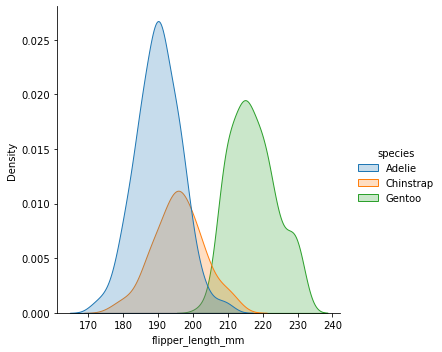

In [7]:
# Visualize the distribution for penguin flipper length with sns.displot()
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde', fill=True)

--- 

## Hypothesis Testing on the Palmer Penguins Dataset: *Does flipper length differ between the Adelie and Chinstrap Species?*
Let's try to perform hypothesis testing on the question we were asking in lecture. We suspect that flipper length varies between penguin species, specifically between the Adelie and Chinstrap species. Within this section of the notebook, we'll be going through the steps you would take to test this hypothesis! 

### Filling Out the Hypothesis Checklist
Within the lecture, we came up with a checklist of basic things to figure out to see if we have a testable hypothesis. As a review within this notebook, there are three questions for this checklist:

1. What are the relevant variables?
2. What is the specific group being studied?
3. What is the predicted outcome of our experiment and/or analysis?

From the lecture, we were able to answer all of these questions! 

<div class="alert alert-block alert-success">
    <p><b>Hypothesis Checklist for Flipper Length Problem:</b></p>
    <ul>
        <li><u>The relevant variables</u>: flipper length</li>
        <li><u>The specific group being studied</u>: Adelie and Chinstrap penguins</li>
        <li><u>The predicted outcome of the analysis</u>: different flipper lengths</li>
    </ul>
</div>

### Forming the Null versus Alternative Hypothesis for our Hypothesis Test 
Following the hypothesis checklist, we can then come up with the a **null hypothesis** and **alternative hypothesis** for our test. Here are the two definitions in case. you need them again: 

* The **null hypothesis** usually states there is *no relationship* between variables (`status quo`)
* The **alternative hypothesis** usually states *the predicted relationship exists* between variables (`change` or `difference`)

Here's our two hypotheses from the lecture: 

<div class="alert alert-block alert-success">
    <p><b>Null and Alternative Hypothesis for Flipper Length Problem:</b></p>
    <ul>
        <li><b>The Null Hypothesis (H<sub>0</sub>)</b>: Adelie penguins <i>do not have</i> different sized flippers than Chinstrap penguins</li>
        <li><b>The Alternative Hypothesis (H<sub>a</sub>)</b>: Adelie penguins <i>do have</i> different sized flippers than Chinstrap penguins</li>
    </ul>
</div>

### Separating and Saving the Adelie and Chinstrap Samples to New Variables for Easier Testing with the `DataFrame.loc[]` Method.
In preparation for our hypothesis testing exercise, let's save our samples to separate variables to make our code a little bit cleaner! To do this, we'll be using the `DataFrame.loc[]` Method, which allows you to locate data points that meet a specific condition. 

Within this section of the notebook, we'll be using the `DataFrame.loc[]` method to identify rows (data points in our dataset) that have a `"Adelie"` or `"Chinstrap"` value within the `species` column! 

In [8]:
# (1) For each value in the species variable, let's check if it equals `Adelie` 
penguins['species'] == 'Adelie'

0       True
1       True
2       True
4       True
5       True
       ...  
338    False
340    False
341    False
342    False
343    False
Name: species, Length: 333, dtype: bool

The output of the command in the previous code block identifies the rows that have the `"Adelie"` value in the `species` column, marking it as `True` if it does have the expected  value, and `False` if it does not have the expected value. 

We can use this command as a parameter **within** the `DataFrame.loc[]` method to sort out which data points belong to Adelie penguins, then save it to a variable. 

<div class="alert alert-block alert-info">
    <p>Take note that the <code>DataFrame.loc[]</code> method uses <b>brackets</b> instead of parentheses!</p>
</div>

In [9]:
# (2) Locate all data points belonging to Adelie penguins
adelie = penguins.loc[penguins['species'] == 'Adelie']

# (3) Use the DataFrame.shape parameter to see how many samples we have
adelie.shape

(146, 7)

<div class="alert alert-block alert-success">
    <p><b>Exercise:</b> Save the 'Chinstrap' species penguins to the variable <code>chinstrap</code>. How many Chinstrap penguins are there in the dataset?</p>
</div>

In [ ]:
# TODO

In [12]:
# Answer
chinstrap = penguins.loc[penguins['species'] == 'Chinstrap']

In [ ]:
# Answer 
chinstrap.shape # should be 68 penguins

---

## Testing Our Flipper Length Hypothesis with a Parametric and Non-Parametric Test through the `scipy.stats` Python Module

Now that we're all prepped for our hypothesis testing, the next step is to perform our statistical test! The main goal of this step is to provide **evidence** that either **supports** or **refutes** your null hypothesis. 

Regardless of the statistical test we choose, it will always generate: 

1. A **test statistic** (e.g., A `t-test` statistic is an estimate of the **difference in means** of the two groups)
2. A **p-value** (e.g., A `t-test` p-value is the **probability of observing** this difference *assuming the null hypothesis is true*)

<div class="alert alert-block alert-info">
    <p><b>Need help figuring out which statistical test to use?</b></p>
    <details>
        <summary><b>[CLICK ME]</b> Useful Cheatsheets for Selecting a Statistical Test</summary>
        <h4>Parametric Test</h4>
        <img src="img/day2_parametric_chart.png" alt="Parametric test flowchart">
        <h4>Non-Parametric Tests</h4>
        <img src="img/day2_nonparametric_chart.png" alt="Non parametric test table">
    </details>
</div>    

Within this next section, we'll be using the `stats` module from the `scipy` Python package. This popular library of code contains functions for a bunch of commonly-used statistical tests!

In [10]:
# Import the scipy.stats module to gain access to statistical tests
from scipy import stats

### Performing a Parametric Test to Evaluate Flipper Length

A **parametric** statistical test assumes the following qualities about our data: 

* The distribution of the data is relatively **normal** 
* We **completely know** everything there is about the population being studied
* We want to measure the difference between the **means** of variables being tested

Within our hypothesis that we've formulated for the flipper length question, we want to see if a `categorical` variable—in our case, the `species` of our penguin—is able to predict a `quantitative` outcome. Because there are only *two* groups being tested—`Adelie` and `Chinstrap` pengins—we can use the `t-test` to test our hypothesis! 

<div class="alert alert-block alert-info">
    <p><b>The Student's t-test</b></p>
    <p>The Student's t-test is a two-sample location test of the null hypothesis such that the means of the two populations are equal.<br>The variances of the two populations are also assumed to be equal.</p>
</div>    

Within this section, let's perform `an independent, two-sample t-test` to compare Adelie penguin flipper lengths against Chinstrap penguin flipper lengths from the Palmer Penguin dataset! We can use the `scipy.stats.ttest_ind()` method to do this! 

In [13]:
ttest_result = stats.ttest_ind(adelie['flipper_length_mm'], 
                               chinstrap['flipper_length_mm'])

In [14]:
ttest_result

Ttest_indResult(statistic=-5.797900789295094, pvalue=2.413241410912911e-08)

Let's set our significance threshold as `0.05` through the variable called `alpha`, then evaluate if the p-value we got from the significance test is below that threshold.

In [15]:
# Set the significance threshold as 0.05 
alpha = 0.05

In [16]:
# Evaluate if the p-value of our test result is below our threshold
ttest_result.pvalue < alpha

True

<div class="alert alert-block alert-success">
    <p><b>Exercise:</b> Does the outcome of your test support or refute your null hypothesis?</p>
    <p><b>Note:</b> The convention is to use an <code>alpha</code> (aka significance threshold) of <code>0.05</code>. This does not necessarily fit every scenario, especially if you are testing something with wide-ranging consequences e.g. whether a drug works in a clinical trial! This is merely a framework to assign statistical significance and at best evidence to support a hypothesis.</p>
</div>

In [ ]:
# TODO

In [ ]:
# Answer
# Yes, p-value is < 0.05

### Performing a Non-Parametric Test to Evaluate Flipper Length
A **non-parametric** statistical test assumes the following qualities about our data:

* The distribution of the data is **non-normal** 
* We **do not know** everything there is to know about the population being studied 
* We want to measure the difference between the **medians** of the variables being tested. 

As the `Wilcoxon rank-sum test` can be used as the non-parametric equivalent of the `t-test`, we'll be using the former within this portion of the notebook. 

<div class="alert alert-block alert-info">
    <p><b>Wilcoxon rank-sum test</b></p>
    <p>The Wilcoxon rank-sum test (also known as the Mann-Whitney U test) assumes that all observations from both groups being tested are independent of each other and the results are ordinal. Additionally, under the null hypothesis, it is assumed that the distributions of both populations are equal, and under the alternative hypothesis, that the distributions are not equal.</p>
</div>    

We can use the `scipy.stats.ranksums()` method to perform this test! But... we'll let you figure out how to do so in the last exercise for this notebook! 

<div class="alert alert-block alert-success">
    <b>Exercise:</b> Perform the Wilcoxon rank-sum test with the <code>stats.ranksums()</code> function. Print the statistic and p-value. Does the p-value meet the significance threshold of <code>alpha=0.05</code>? How does the p-value compare to the p-value generated by the t-test?
</div>

In [ ]:
# TODO

In [ ]:
# Answer
ranksums_result = stats.ranksums(adelie['flipper_length_mm'], chinstrap['flipper_length_mm'])
print(ranksums_result)
print(ranksums_result.pvalue < alpha)

# Note that even though we come to the same conclusion, the non-parametric test is more conservative!